## Feature Engineering 

- Data features directly influence the predictive models and the results 
    - Better features means flexibility, simpler model and better performance 
- **Feature engineering** refers to manipulation of features - addition, deletion, combination, mutation, transforming 
    - Can be used in a broad sense and in a narrow sense 

- In a broad sense:
   - Scalling and normalisation
   - Handeling missing values 
   - Feature coding -  e.g. categorical data, text data
   - Feature Importance - estimate the usefulness of a feature
   - Feature selection - select a submset of features 
   - Feature construction - create new features
   - Feature extraction
   - Feature Learning - automatic identification and use of features in raw data

#### Feature Engineering in ML Lifecycle

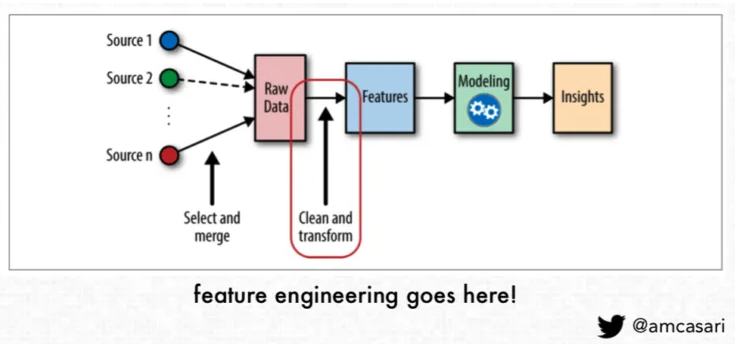


(from “Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari (O’Reilly). Copyright 2018 Alice Zheng and Amanda Casari, 978-1-491-95324-2.”)

### Feature Selection 
- Again there are a broad range of feature selection techniques. 

- Three examplar methods of feature selection:

    - Univariate Feature Selection
    - Tree-Based Feature Selection
    - Greedy Backward Feature Selectionz

#### 1. Univariate Feature Selection

- Examine the **relationship** between the **features** and the **target** class. 

- The main univariate feature selection tools in sklearn are: SelectPercentile and SelectKBest. Both of these functions allow you to run statistical tests between the features and the target class. 



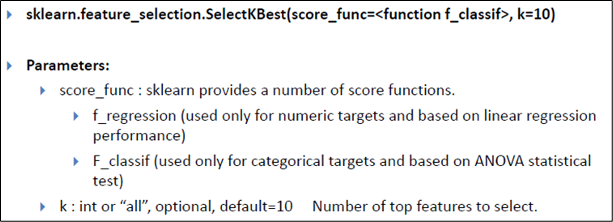

###### Wine dataset: 

The wine dataset is a classic and very easy multi-class classification dataset.

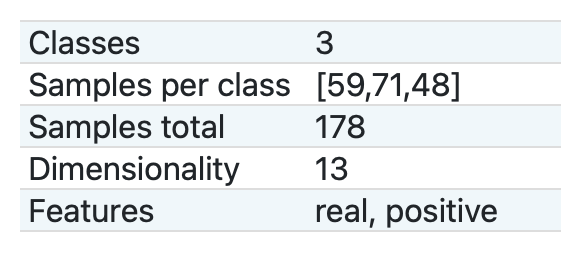

In [ ]:
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

wine = load_wine()

X = wine.data

y = wine.target

# SelectPercentile removes all but a user-specified highest scoring percentage of features, i.e. 25% 
selector = SelectPercentile(f_regression, percentile=25)


selector.fit(X,y)


In [ ]:
for n,s in zip(wine.feature_names, selector.scores_):
    print ("Score : ", s, " for feature ", n)

In [ ]:
# SelectKBest Select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest,chi2
selectorK = SelectKBest(chi2, k=5)

FeatureK = selectorK.fit(X,y)

In [ ]:
for n,s in zip(wine.feature_names, selectorK.scores_):
    print ("Score : ", s, " for feature ", n)

##### Discussion

- more information at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
- These univariate tests have certain limitations. Some variables may be **unfairly penalized**. For example, the binary variable CHAS (from the previous example) is very weakly associated with the target variable but is in fact quite a good predictor. 
- Univariate feature selection can negatively bias against categorical data types, especially those that have a limited range of values. 


#### 2. Tree Based Feature Selection:

- Decision trees work by reducing the level of **uncertainty** or **impurity** in the data and can use one of a range of metrics to do this (gini, entropy, etc). 


- They select the feature that provides the largest reduction in overall uncertainty. 

- Also for each feature we can quantify (measure) the reduction in uncertainty. 


- **Tree based feature selection** builds many trees and calculates the **average reduction in uncertainty** achieved by each feature across all the trees and uses this as a means of feature ranking. 

- The features with the largest reduction have the highest impact (the most important features). 

- feature selection techniques fall into three classes:
    - Filtering
    - Wrapper methods
    - Embedded methods

##### Filtering
- Filtering techniques preprocess features to remove ones that are unlikely to be useful for the model. 
- For example, one could compute the correlation or mutual information between each feature and the response variable, and filter out the features that fall below a threshold. 

- Filtering techniques are much cheaper than the wrapper techniques described next, but they do not take into account the model being employed.
- Hence, they may not be able to select the right features for the model. 
- It is best to do prefiltering conservatively, so as not to inadvertently eliminate useful features before they even make it to the model training step.

##### Wrapper methods
- Try out subsets of features, which means you won’t accidentally prune away features that are uninformative by themselves but useful when taken in combination.
- These techniques are expensive
- The wrapper method treats the model as a black box that provides a quality score of a proposed subset for features. There is a separate method that iteratively refines the subset.

##### Embedded methods
- These methods perform feature selection as **part of the model training process**. For example, a decision tree inherently performs feature selection because it selects one feature on which to split the tree at each training step. 
- They are not as powerful as wrapper methods, but they are nowhere near as expensive.
- Compared to filtering, embedded methods select features that are specific to the model. 
- In this sense, embedded methods strike a balance between computational expense and quality of results.

##### Ensemble learning

- In machine learning, ensemble methods utilize/**combine the results** from a number of learning algorithms to obtain a better predictive performance than could be obtained from any single one of the learning algorithms learning algorithms


- ** Instead of learning one model, we learn several** and combine them (vote for classification, average for regression). Such combinations are known as model ensembles. 
    - Note the base learners could be the same model or different models


- They are among the most powerful techniques in machine learning. Typically improve accuracy (they can often significantly improve performance)

- One approach to building ensemble techniques is called **bagging**

##### Introduction to Bagging
- **Bagging, short for “bootstrap aggregating”** is a simple but effective technique that creates different models on **random samples** of the original data set. 
    - These samples are taken uniformly with replacement and are known as **bootstrap samples**.
- Learn one model for each sample 

- Because samples are taken at random with replacement each sample will normally contain **duplicates** and hence some of the original data will be missing from your sample. 

- This technique has shown that **statistically each of the samples look very similar** (variance, mean,etc)

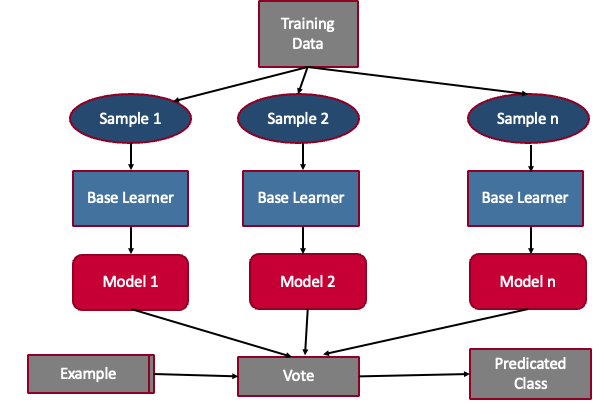

##### Decision Trees as Base Learners
- Bagging is particularly effective with **decision tree models**. 

- Decision trees can be **very sensitive to the underlying data**. Changing a small percentage of the training data could produce a very different looking tree (in particular the lower levels).

- When applied with tree models bagging is often combined with another technique called subspace sampling, building each tree from a different **random subset of the features**. 

##### Random forest
- The process of building a tree from a random subset of the features is called **subspace sampling**. 
- This process encourages the diversity of the ensemble even more.
- The resulting ensemble method is called **Random Forests**. 



**Input**: data set $D$; ensemble size $T$; subspace dimension $d$

**Output**: ensemble of tree models whose predictions are to be combined by voting or averaging. 

**for** $t=1$ to $T$ **do**:

   - Build a bootstrap sample $D_t$ from $D$ by sampling $|D|$ data points with replacement
   - Select $d$ features at random and reduce dimensionality of $D_t$ accordingly
   - Train a tree Model $M_t$ on $D_t$

**end**
**return** $M_t$


##### Back to Feature Selection
- When **building a single decision tree** every time it creates a new split it looks at the data available for that split and determines which feature provides the **greatest reduction in uncertainly**. 

- The Random Forest will build many trees (you control the number of trees built). It can then return the **feature importance** of each feature by **averaging the reduction in uncertainty** achieved by each feature across all trees generated. 

- The default measure of uncertainty used in a RF is the **Gini index**. 


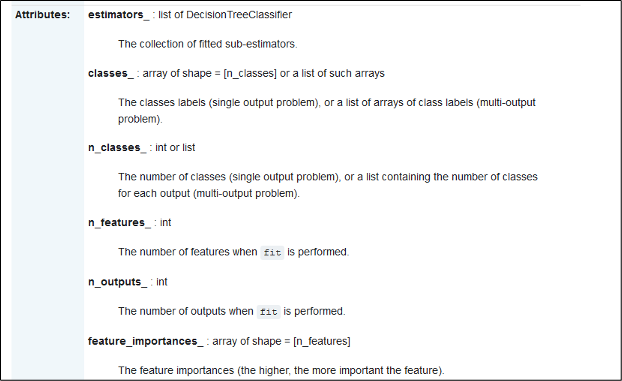

In [ ]:
#Tree – Based Feature Selection
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=4,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
# Build a forest and compute the feature importance
forest = RandomForestClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_


In [ ]:
for index in range(len(X[0])):
    print ("Importance of feature ", index, "is", importances[index])


#### 3. Greedy feature selection:

- automatically reduces the number of features involved in a learning model based on their effective contribution to the overall accuracy performance of the algorithm. 

- The **RFECV** class provides a greedy backward search that can provide you with information on the number of useful features, points them out to you and automatically transform the X data, into a reduced variable set



- Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model) or that builds a feature importance array , recursive feature elimination (RFE) selects features by recursively considering smaller and smaller sets of features. 
    - First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a **coef_ attribute** or through a **feature_importances_ attribute**. 
    - Then, the least important feature is pruned from current set of features. 
    - That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached (or until all features have been ranked).


- The basic syntax is as follows: 

   - **RFECV(estimator, step=1, cv=None)**

- Note you should select an estimator that should provide information about feature importance through a **coef_ attribute or feature_importance**


- Returns
    - **n_features_** : number of selected features (these are the number of features that gave the strongest result)
    - **ranking_** : feature ranking such that ranking_[i] corresponds to the ranking position of the i-th feature   (Best features ranked 1)
    - **support_**  : Boolean array containing a true if feature is selected (as rank 1), false otherwise
    - **grid_scores_** : array of shape [n_subsets_of_features]
    - The scores such that grid_scores_[i] corresponds to the score of the i-th subset of features.


In [ ]:
# Create the classification dataset and assess the accuracy of a DecisionTree Model.
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import matplotlib.pyplot as plt

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

decTree = DecisionTreeClassifier()
scores = model_selection.cross_val_score(decTree, X, y, cv=10)
print ('Initial Result',scores.mean())

In [ ]:
#Execute RFECV to rank features. 
estimator = linear_model.LogisticRegression(multi_class='auto', solver ='lbfgs')
rfecv = RFECV(estimator, cv=10, scoring="accuracy",)
rfecv.fit(X, y)

# optimal number of features
print (rfecv.n_features_)

# ranking of each feature
print (rfecv.ranking_)


In [ ]:
# select highest ranked features and build a new model

## Use the Boolean mask array support_ to access the features that are ranked highest (as rank 1). 
X = X[ : , rfecv.support_ ] 

# Rebuild the decision tree and assess the accuracy on the reduced dataset.  
decTree = DecisionTreeClassifier()
scores = model_selection.cross_val_score(decTree, X, y, cv=10)
print ('Result after feature selection: ',scores.mean())


In [ ]:
# plot to show the impact of feature numbers to performance
min_features_to_select =1 
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.figure()
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

### Dimensionality Reduction

- Dimensionality reduction is the process of converting a dataset that typically has a large number of features into a dataset with a reduced number of features (in some cases a significantly reduced number of features). 

- This is **not** the same thing as **feature selection** as the reduced set of features may not be a subset of the original features. 

- Dimensionality reduction algorithms such as PCA performs a **linear transformation** of $d$ dimensional input to $m$ dimensional feature vectors such that  $m < d$, while attempting to that explain a maximum amount of the variance.

- Can be used very effectively for reducing the dimensionality when you have a very large number of features. A typical application would be image analysis. 

#### Principal component analysis (PCA)
- PCA is by far the most popular method used for dimensionality reduction. 

- The objective of the PCA algorithm is to find a surface on to which to project the data so as to minimize the projection error 

- Note the PCA expects that your data has been **standardized in advance**. 

- More specify we want to identify k vectors that minimize the projection error where the projection error is defined as: 
  
    
  $$
     \frac{1}{m}\sum_{i=1}^m|x^i− x_{mapped}^i|^2
  $$
     
   

 
- First it computes a covariance matrix between all the features  (n  *  n matrix)

- Then compute the eigenvectors of the convariance matrix and you can do that using singular value decomposition. 

- PCA is a parameterized algorithm. We specify in advance the a parameter value $k$, the number of features vectors the algorithm will return. 

- Typically the selection of a value for $k$ is made depending on the $retained variance$ from running PCA with the value $k$. You can think of the retained variance as a measure of how effective the projection process employed by PCA. 

- You will hear phrases such as selecting a value of k resulted in “99% of the variance retained”.  Another common measure would be “95% of the variance retained”. 


##### Example - Iris dataset
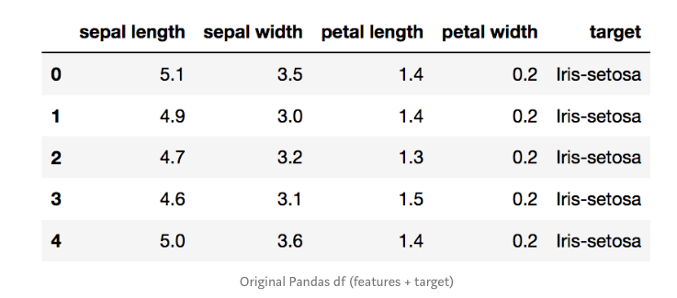


In [ ]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
clf = SVC(gamma='auto')
scores = cross_val_score(clf, X, iris.target, cv=10)
print ("Original Accuracy", np.mean(scores))

In [ ]:
# Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space. 
# find best 2 components
# this is exact PCA, also could randomized SVD, or use Incremental PCA, Kernel PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
# Percentage of variance explained by each of the selected components:
print ("Explained Variance: ",np.sum(pca.explained_variance_ratio_))

In [ ]:
clf = SVC(gamma='auto')
clf.fit(X, y)
scores = cross_val_score(clf, X, iris.target, cv=10)

print (np.mean(scores))

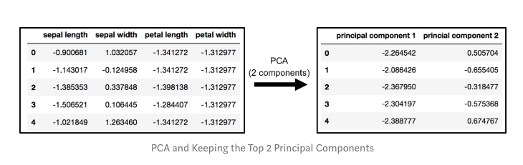
- PCA projects the original data which is 4 dimensional into 2 dimensions
- The new components are just the two main dimensions of variation, no a particular meaning

In [ ]:
#use Decision Tree
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, iris.target, cv=10)
print ("Original Accuracy", np.mean(scores))

In [ ]:
pca = decomposition.PCA(n_components = 'mle', svd_solver = 'full')
pca.fit(X)
X = pca.transform(X)
print ("Explained Variance: ",np.sum(pca.explained_variance_ratio_))

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, iris.target, cv=10)

print (np.mean(scores))

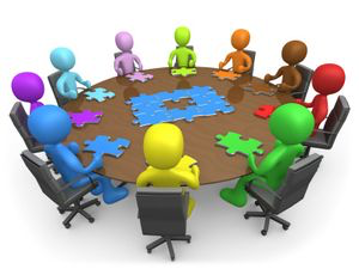